### Feature Selection

**A seleção de características, ou feature selection** em inglês, refere-se ao processo de escolher um subconjunto relevante de características (variáveis, atributos) de um conjunto de dados mais amplo. Em muitos problemas de análise de dados e aprendizado de máquina, os conjuntos de dados podem conter uma grande quantidade de características, algumas das quais podem ser redundantes, irrelevantes ou até mesmo prejudiciais para o desempenho do modelo.

In [1]:
library(readr)

Warning message:
"package 'readr' was built under R version 4.2.3"


In [2]:
#Usaremos o mesmo Dataset usado para prever o numero de usuários convertidos- Marketing Digital;
df_md <- read_csv('dataset.csv')
head(df_md)
dim(df_md)

Rows: 500 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): valor_gasto_campanha, numero_visualizacoes, numero_cliques, usuario...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


valor_gasto_campanha,numero_visualizacoes,numero_cliques,usuarios_convertidos
<dbl>,<dbl>,<dbl>,<dbl>
875,4390,54,30
1451,7120,90,72
1232,6198,67,47
1099,5554,70,63
656,3336,41,34
656,3388,34,18


[1] 500   4

In [3]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



### A ideia principal por trás do RandomForest é criar várias árvores de decisão durante o treinamento e, em seguida, combinar suas previsões para obter uma previsão mais robusta e geral. Cada árvore de decisão é treinada em uma amostra aleatória do conjunto de dados e faz previsões independentes.

In [4]:
# Avalidando a importância de todas as variaveis
modelo1 <- randomForest(usuarios_convertidos ~ . , 
                       data = df_md, 
                       ntree = 100, 
                       nodesize = 10,
                       importance = TRUE)

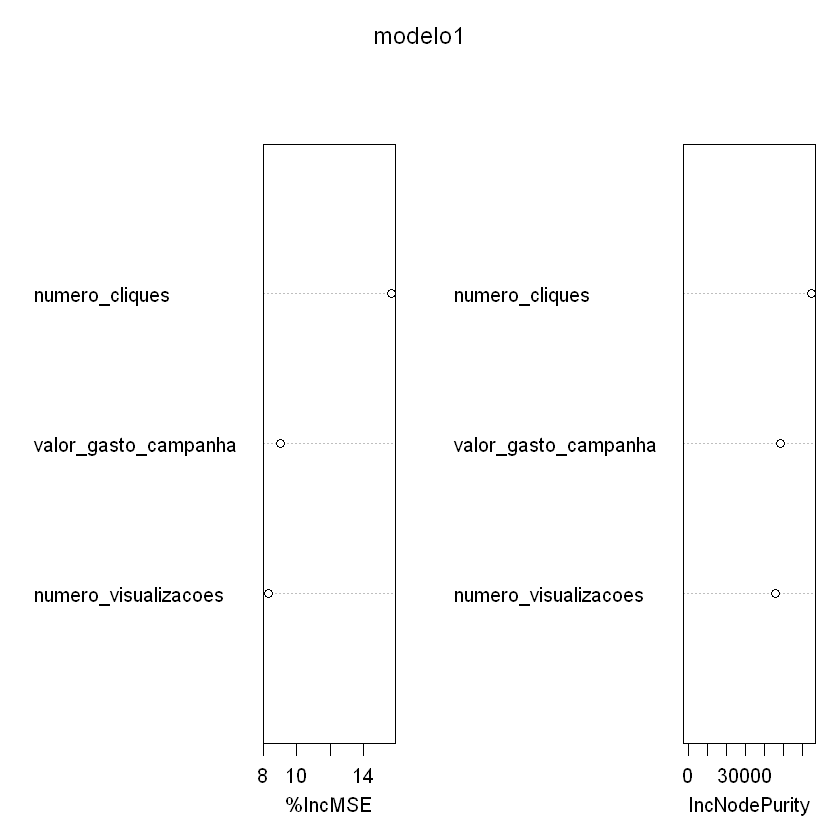

In [5]:
# Plotando as variáveis por grau de importância
varImpPlot(modelo1)

#### Ao utilizar o algoritmo de floresta aleatória, a importância das características pode ser avaliada através da métrica denominada "incMSE" (Incremento na Soma dos Quadrados dos Erros) ou "incNodePurity" (Incremento na Pureza do Nó), dependendo da biblioteca ou implementação específica. Essa métrica é usada para avaliar a contribuição relativa de cada característica no processo de tomada de decisão da floresta aleatória. Quanto maior o valor de incMSE ou incNodePurity para uma determinada característica, mais importante ela é considerada para o modelo.
### Na representação gráfica, normalmente, quanto mais à direita uma característica estiver nessa tabela ou gráfico, mais importante ela é.

In [6]:
# Avalidando a importância de todas as variaveis
modelo2 <- randomForest(usuarios_convertidos ~ numero_cliques + valor_gasto_campanha , 
                       data = df_md, 
                       ntree = 100, 
                       nodesize = 10,
                       importance = TRUE)

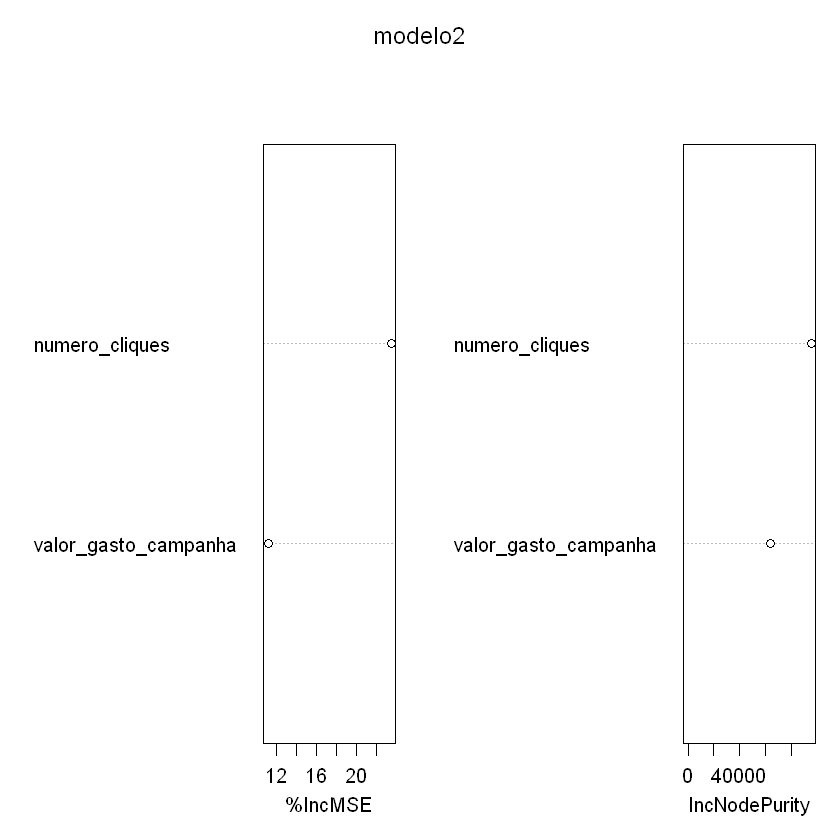

In [7]:
varImpPlot(modelo2)